In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv("USCarrier_Traffic_2.csv")
df.head()                                      # data from jan-2000 to Feb-2020

,Period,Total
0,January 2000,49045412
1,February 2000,49306303
2,March 2000,60443541
3,April 2000,58286680
4,May 2000,60533783


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Period  242 non-null    object
 1   Total   242 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [4]:
df1 = df.copy()
for i in range(len(df1.Period)):
    df1.Period.loc[i] = datetime.strftime(datetime.strptime(df.Period.loc[i], '%B %Y'), '%m-%Y')
df1

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Period,Total
0,01-2000,49045412
1,02-2000,49306303
2,03-2000,60443541
3,04-2000,58286680
4,05-2000,60533783
...,...,...
237,10-2019,88208131
238,11-2019,81010193
239,12-2019,90389583
240,01-2020,81530654


In [5]:
df1.set_index('Period', inplace = True)
df1

,Total
Period,
01-2000,49045412
02-2000,49306303
03-2000,60443541
04-2000,58286680
05-2000,60533783
...,...
10-2019,88208131
11-2019,81010193
12-2019,90389583


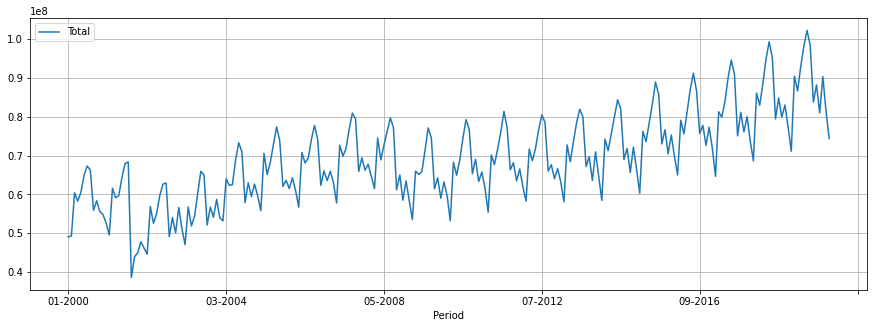

In [6]:
df1.plot(kind="line",figsize=(15,5), grid = 1)
plt.show()

data is seasonal(12 months).

data is showing upward/increasing trend.

Every year peak is reached in May and lowest point is observed in Feb. (for most years)

In Sep-2001, the Total drops to its ever lowest and then rises again. 

small decrease is observed at Feb-2009. After that a constant yearly/seasonal increases is observed

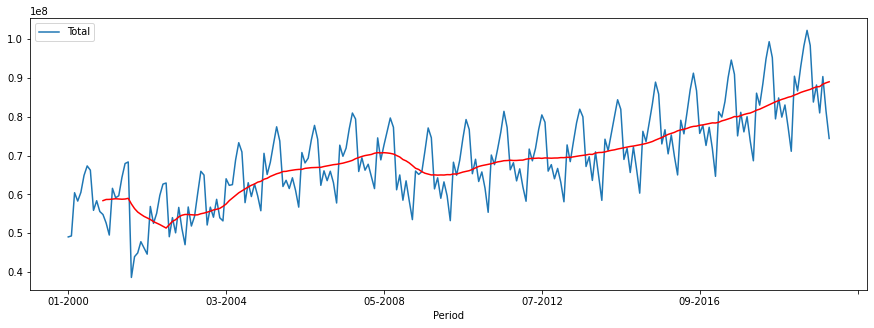

In [7]:
moving_avg =df1['Total'].rolling(12).mean()
df1.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

<ipython-input-8-8827586c604c>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sts.seasonal_decompose(df1['Total'],model='multiplicative', freq=12)


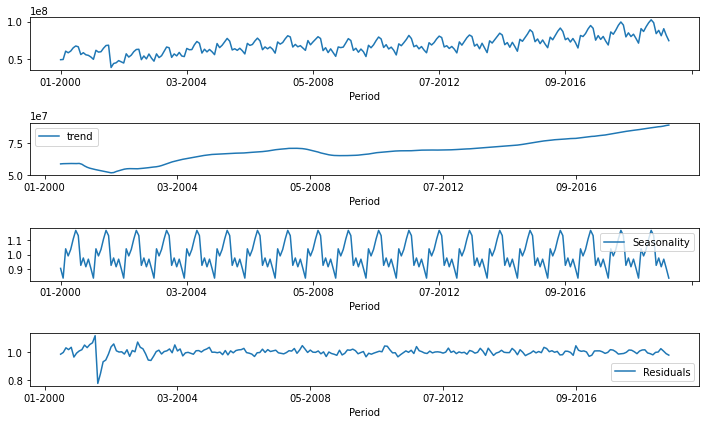

In [8]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df1['Total'],model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df1['Total'].plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<ipython-input-9-bc4ae9cd49b6>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sts.seasonal_decompose(df1['Total'],model='additive', freq=12)


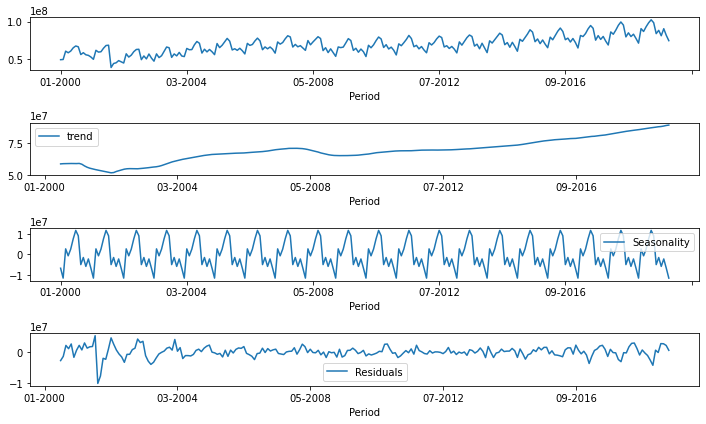

In [9]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df1['Total'],model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df1['Total'].plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
# Testing the stationarity of the data using dickey fuller test

from statsmodels.tsa.stattools import adfuller

In [13]:
test_result = adfuller(df1['Total'])

In [14]:
#Ho: Data is not stationary
#H1: Data is stationary

def adfuller_test(total):
    result = adfuller(total)
    labels = ['ADF Test Statistics', 'P-value', '#Lags Used', 'Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Data is stationary')
    else:
        print('Not enough evidence to say that data is stationary')

In [15]:
adfuller_test(df1['Total'])

ADF Test Statistics : 0.225761691209804
P-value : 0.9736700338852048
#Lags Used : 13
Number of Observation Used : 228
Not enough evidence to say that data is stationary


In [16]:
df_difference = df1.copy()
df_difference['seasonal_first_difference'] = df_difference['Total'] - df_difference['Total'].shift(12)
df_difference.head(15)

,Total,seasonal_first_difference
Period,,
01-2000,49045412,NaN
02-2000,49306303,NaN
03-2000,60443541,NaN
04-2000,58286680,NaN
05-2000,60533783,NaN
06-2000,64903295,NaN
07-2000,67346377,NaN
08-2000,66256804,NaN
09-2000,55900504,NaN


In [17]:
adfuller_test(df_difference['seasonal_first_difference'].dropna())

ADF Test Statistics : -2.9218601587456554
P-value : 0.042864374027218856
#Lags Used : 13
Number of Observation Used : 216
Data is stationary


<AxesSubplot:xlabel='Period'>

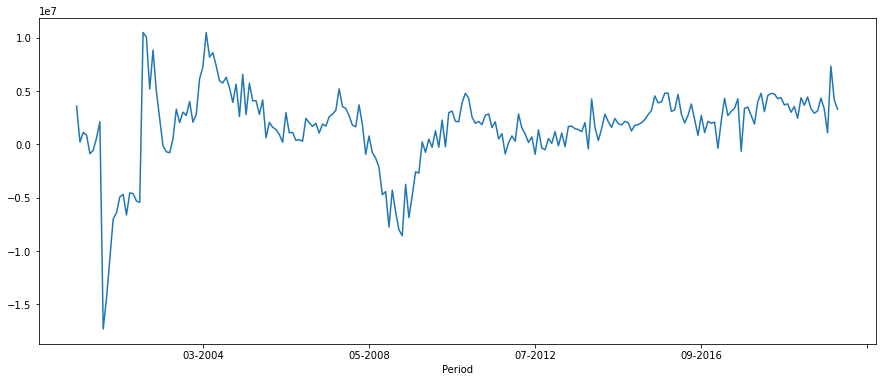

In [18]:
df_difference['seasonal_first_difference'].plot()

In [23]:
# selecting the value of p,d,q
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

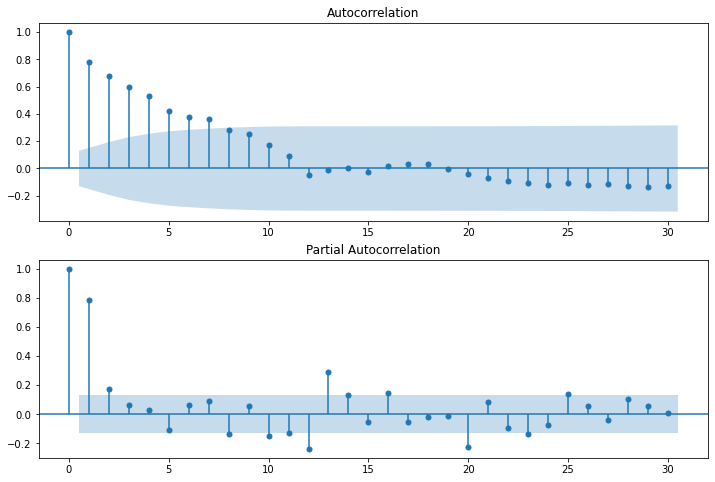

In [25]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df_difference['seasonal_first_difference'].iloc[13:], lags= 30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df_difference['seasonal_first_difference'].iloc[13:], lags= 30, ax=ax2)

p = 2

q = 10

d = 1   (as we did seasonal differecing only once)

In [26]:
df2 = df1['Total']
train = df2[:230]
test = df2[230:]

### Model 1 (SARIMAX)

In [27]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(train, order=(2,1,10), seasonal_order=(2,1,10,12))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [28]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Total   No. Observations:                  230
Model:             SARIMAX(2, 1, 10)x(2, 1, 10, 12)   Log Likelihood               -3503.880
Date:                              Thu, 29 Apr 2021   AIC                           7057.760
Time:                                      09:32:42   BIC                           7142.257
Sample:                                  01-01-2000   HQIC                          7091.893
                                       - 02-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4016      0.043     -9.432      0.000      -0.485      -0.318
ar.L2         -0.74

In [29]:
Forecast = model_fit.forecast(steps=12)
forecast_df = pd.DataFrame(Forecast)
forecast_df = forecast_df.reset_index()
forecast_df = forecast_df.rename(columns={'index':'Period'})

In [30]:
forecast_df['Period'] = forecast_df['Period'].astype(str)

for i in range(len(forecast_df['Period'])):
    forecast_df['Period'].loc[i] = datetime.strftime(datetime.strptime(forecast_df['Period'].loc[i], '%Y-%m-%d'), '%m-%Y')
forecast_df.set_index('Period', inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


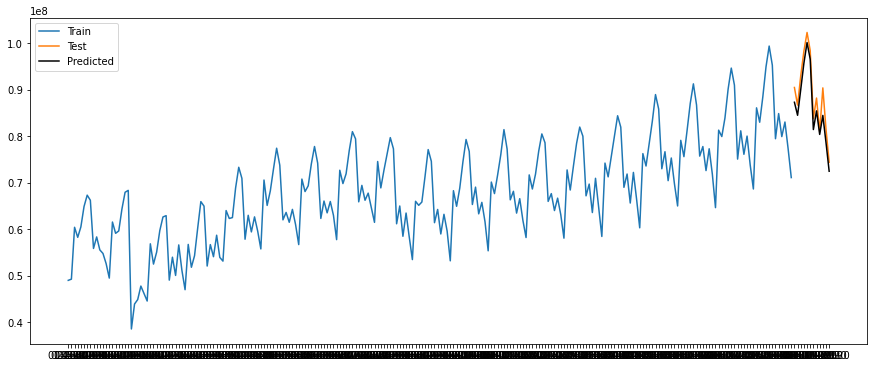

In [31]:
import matplotlib.dates as mdates

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df, label='Prediction', color='black')
#sns.lineplot(x ='Period',y='Total', data = df1[:230])
#sns.lineplot(x ='Period',y='Total', data = df1[230:])
#sns.lineplot( x =forecast_df.index, y = 'predicted_mean', data = forecast_df)

#datemin = datetime.date(2000, 1, 1)
#datemax = datetime.date(2021, 1, 1)
#plt.gca().set_xlim(datemin, datemax)

#dtFmt = mdates.DateFormatter('%m-%Y')
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
#plt.gca().xaxis.set_major_formatter(dtFmt)

plt.legend(['Train', 'Test', 'Predicted'])
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE_SARIMAX = mean_absolute_error(y_true=test,y_pred=forecast_df['predicted_mean'])
MAE_SARIMAX

2614008.9732238464

### Model 2 (ARIMA)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model2 = ARIMA(train, order=(2,1,10))
model2_fit=model2.fit(disp=True)
print(model2_fit.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                  229
Model:                ARIMA(2, 1, 10)   Log Likelihood               -3812.792
Method:                       css-mle   S.D. of innovations        3881336.971
Date:                Thu, 29 Apr 2021   AIC                           7653.584
Time:                        09:34:10   BIC                           7701.657
Sample:                    02-01-2000   HQIC                          7672.978
                         - 02-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.641e+04   1.27e+04      7.578      0.000    7.15e+04    1.21e+05
ar.L1.D.Total     -1.7317        nan        nan        nan         nan         nan
ar.L2.D.Total     -0.9985        nan

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


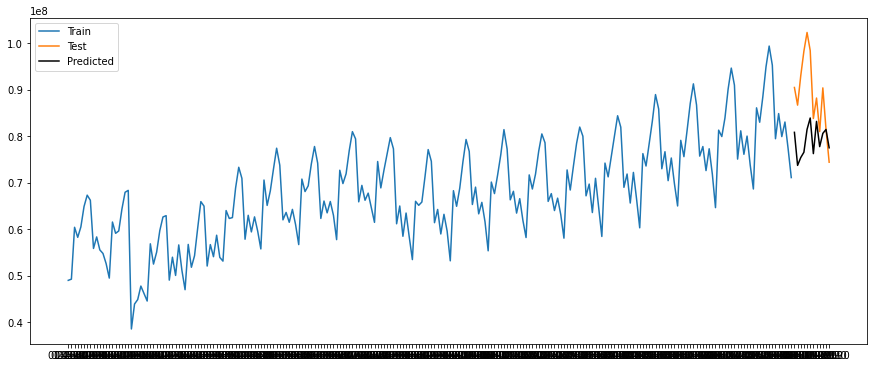

In [35]:
forecast2 = model2_fit.forecast(steps=12)[0]

forecast2 = pd.DataFrame(forecast2,index = test.index,columns=['Prediction'])

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast2, label='Prediction', color='black')
plt.legend(['Train', 'Test', 'Predicted'])
plt.show()

In [36]:
MAE_ARIMA = mean_absolute_error(y_true=test,y_pred=forecast2)
MAE_ARIMA

10491974.38490582

### Model 3 (Simple Exponential Smothing) 

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [38]:
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(12)
ses.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,230
Model:,SimpleExpSmoothing,SSE,10271903570065892.000
Optimized:,True,AIC,7232.925
Trend:,None,BIC,7239.801
Seasonal:,None,AICC,7233.103
Seasonal Periods:,None,Date:,"Thu, 29 Apr 2021"
Box-Cox:,False,Time:,09:34:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7302326,alpha,True
initial_level,4.9045e+07,l.0,True


In [39]:
ses1_df = pd.DataFrame(ses1)
ses1_df = ses1_df.reset_index()
ses1_df = ses1_df.rename(columns={'index':'Period', 0:'Predicted_Total'} )

In [40]:
ses1_df['Period'] = ses1_df['Period'].astype(str)

for i in range(len(ses1_df['Period'])):
    ses1_df['Period'].loc[i] = datetime.strftime(datetime.strptime(ses1_df['Period'].loc[i], '%Y-%m-%d'), '%m-%Y')
ses1_df.set_index('Period', inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


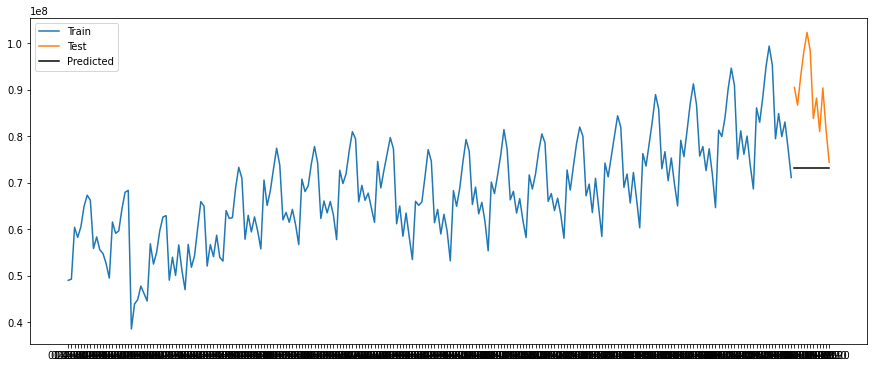

In [41]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(ses1_df, label='Prediction', color='black')
plt.legend(['Train', 'Test', 'Predicted'])
plt.show()

In [42]:
MAE_SES = mean_absolute_error(y_true=test,y_pred=ses1)
MAE_SES

15861373.744148642

### Model 4 (Exponential Smoothing)

In [56]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,230
Model:,ExponentialSmoothing,SSE,922049706958326.750
Optimized:,True,AIC,6706.494
Trend:,Additive,BIC,6761.504
Seasonal:,Additive,AICC,6709.736
Seasonal Periods:,12,Date:,"Thu, 29 Apr 2021"
Box-Cox:,False,Time:,10:02:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,True
smoothing_trend,0.0250000,beta,True


In [57]:
hwes1 = hwes.forecast(12)

In [58]:
hwes1_df = pd.DataFrame(hwes1)
hwes1_df = hwes1_df.reset_index()
hwes1_df = hwes1_df.rename(columns={'index':'Period', 0:'Predicted_Total'} )

In [59]:
hwes1_df['Period'] = hwes1_df['Period'].astype(str)

for i in range(len(hwes1_df['Period'])):
    hwes1_df['Period'].loc[i] = datetime.strftime(datetime.strptime(hwes1_df['Period'].loc[i], '%Y-%m-%d'), '%m-%Y')
hwes1_df.set_index('Period', inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


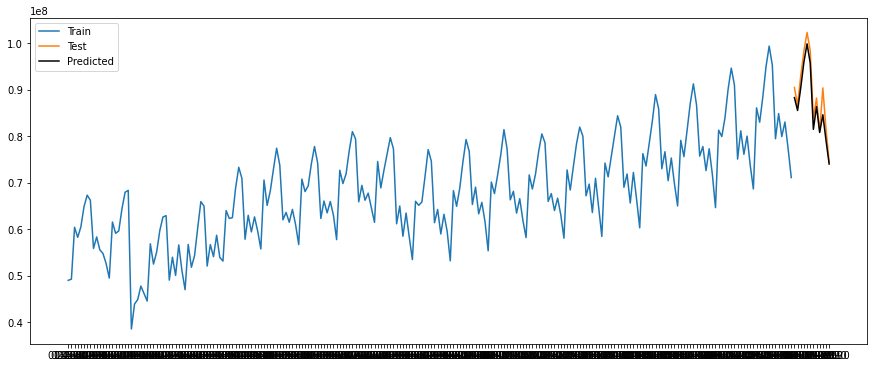

In [60]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(hwes1_df, label='Prediction', color='black')
plt.legend(['Train', 'Test', 'Predicted'])
plt.show()

In [61]:
MAE_ES = mean_absolute_error(y_true=test,y_pred=hwes1)
MAE_ES

2187282.3061475554

In [62]:
print('SARIMAX -->', MAE_SARIMAX)
print('ARIMA  --->', MAE_ARIMA)
print('SES    --->', MAE_SES)
print('ES     --->', MAE_ES)

SARIMAX --> 2614008.9732238464
ARIMA  ---> 10491974.38490582
SES    ---> 15861373.744148642
ES     ---> 2187282.3061475554


ExponentialSmoothing is giving the best results. So we will be forecasting for next 12 months using ExponentialSmoothing.

In [63]:
Final_model = ExponentialSmoothing(df1 , seasonal_periods=12 ,trend='add', seasonal="additive").fit()
Final_model.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,242
Model:,ExponentialSmoothing,SSE,960096048181702.000
Optimized:,True,AIC,7052.206
Trend:,Additive,BIC,7108.029
Seasonal:,Additive,AICC,7055.274
Seasonal Periods:,12,Date:,"Thu, 29 Apr 2021"
Box-Cox:,False,Time:,10:03:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4646429,alpha,True
smoothing_trend,0.0244549,beta,True


In [64]:
Final_model_pre = Final_model.forecast(12)

In [65]:
Final_model_pre = pd.DataFrame(Final_model_pre)
Final_model_pre = Final_model_pre.reset_index()
Final_model_pre = Final_model_pre.rename(columns={'index':'Period', 0:'Predicted_Total'} )

In [66]:
Final_model_pre['Period'] = Final_model_pre['Period'].astype(str)

for i in range(len(Final_model_pre['Period'])):
    Final_model_pre['Period'].loc[i] = datetime.strftime(datetime.strptime(Final_model_pre['Period'].loc[i], '%Y-%m-%d'), '%m-%Y')
Final_model_pre.set_index('Period', inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


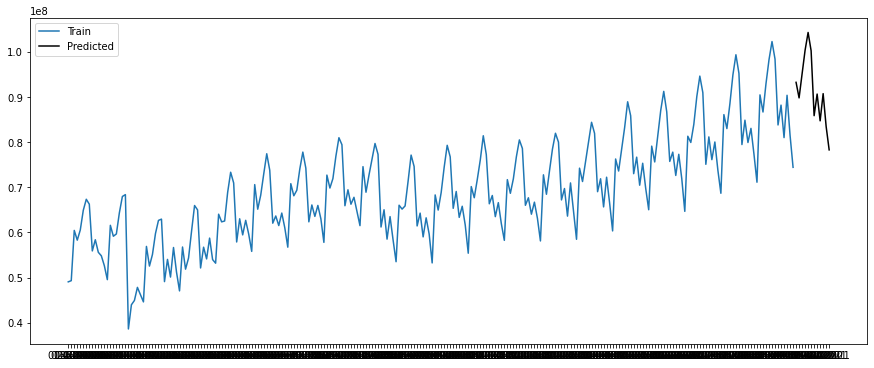

In [67]:
plt.plot(df1, label='Train')
plt.plot(Final_model_pre, label='Prediction', color='black')
plt.legend(['Train', 'Predicted'])
plt.show()

In [68]:
Final_model_pre

,Predicted_Total
Period,
03-2020,9.326038e+07
04-2020,8.981115e+07
05-2020,9.513290e+07
06-2020,1.003816e+08
07-2020,1.043111e+08
08-2020,1.002728e+08
09-2020,8.587114e+07
10-2020,9.066118e+07
11-2020,8.472843e+07


Above are the predictions of the ES model.